 import libraries

In [1]:
%reload_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

import seaborn as sns

import pickle
##from SCRIPT.eval_tools import *

 let's load some data! 🥒

In [4]:
with open('pickle/timeseries_condo_subset_percent.pkl', 'rb') as fp:
    subset_percent = pickle.load(fp)

In [5]:
with open('pickle/timeseries_condo_subset.pkl', 'rb') as fp:
    subset = pickle.load(fp)

In [6]:
subset.head(6)

,95823,95630,95624,95758,95608,95828,95670,95843,95610,95822,...,95825,95632,95842,95662,95834,95864,95841,95814,95811,95683
01/2008,133802.0,277974.0,186656.0,256688.0,209687.0,223392.0,256915.0,177058.0,230984.0,347985.0,...,235793.0,239334.0,176263.0,187326.0,221575.0,398713.0,150816.0,434479.0,363798.0,364938.0
02/2008,131579.0,273775.0,179289.0,247593.0,205596.0,219648.0,252203.0,173133.0,227958.0,344096.0,...,230673.0,236015.0,171678.0,186515.0,216820.0,391191.0,148098.0,426243.0,358181.0,354239.0
03/2008,128764.0,266485.0,172115.0,238262.0,199208.0,211567.0,244790.0,164889.0,221193.0,333530.0,...,223225.0,232652.0,163985.0,182649.0,209373.0,380798.0,142573.0,408132.0,348245.0,339433.0
04/2008,126656.0,260789.0,166903.0,230688.0,194521.0,203666.0,238195.0,159555.0,216235.0,326926.0,...,217846.0,225362.0,158003.0,177305.0,201677.0,372232.0,138253.0,394551.0,342489.0,330048.0
05/2008,122624.0,255940.0,161447.0,221088.0,190511.0,194934.0,233300.0,153945.0,211726.0,319430.0,...,213802.0,217830.0,152396.0,169765.0,194127.0,366791.0,135439.0,386681.0,338753.0,322503.0
06/2008,118191.0,250828.0,156799.0,213029.0,185951.0,187536.0,227772.0,149730.0,208245.0,315347.0,...,208940.0,209580.0,149099.0,166113.0,187351.0,361283.0,132164.0,384415.0,337734.0,313419.0


In [7]:
subset_percent = condo_subset_percent

In [8]:
subset_percent.head()

,95823,95630,95624,95758,95608,95828,95670,95843,95610,95822,...,95825,95632,95842,95662,95834,95864,95841,95814,95811,95683
02/2008,-1.661410,-1.510573,-3.946833,-3.543212,-1.951003,-1.675978,-1.834070,-2.216788,-1.310047,-1.117577,...,-2.171396,-1.386765,-2.601227,-0.432935,-2.146000,-1.886570,-1.802196,-1.895604,-1.543989,-2.931731
03/2008,-2.139399,-2.662771,-4.001361,-3.768685,-3.107064,-3.679068,-2.939299,-4.761657,-2.967652,-3.070655,...,-3.228813,-1.424909,-4.481063,-2.072756,-3.434646,-2.656758,-3.730638,-4.248985,-2.774016,-4.179664
04/2008,-1.637104,-2.137456,-3.028208,-3.178854,-2.352817,-3.734514,-2.694146,-3.234903,-2.241481,-1.980032,...,-2.409676,-3.133435,-3.647895,-2.925830,-3.675737,-2.249487,-3.030027,-3.327600,-1.652859,-2.764905
05/2008,-3.183426,-1.859358,-3.268965,-4.161465,-2.061474,-4.287412,-2.055039,-3.516029,-2.085231,-2.292874,...,-1.856357,-3.342178,-3.548667,-4.252559,-3.743610,-1.461723,-2.035399,-1.994672,-1.090838,-2.286031
06/2008,-3.615116,-1.997343,-2.878963,-3.645155,-2.393563,-3.795131,-2.369481,-2.737991,-1.644106,-1.278214,...,-2.274067,-3.787357,-2.163443,-2.151209,-3.490498,-1.501673,-2.418063,-0.586013,-0.300809,-2.816718


  train test split

In [9]:
trdf_percent = subset_percent.iloc[:-40]
trdf_percent.index = pd.to_datetime(trdf_percent.index)

In [10]:
trdf_price = subset.iloc[:-40]
trdf_price.index = pd.to_datetime(trdf_price.index)

 Average Percent Increase of Housing Price

In [11]:
subset_percent.head(3)

,95823,95630,95624,95758,95608,95828,95670,95843,95610,95822,...,95825,95632,95842,95662,95834,95864,95841,95814,95811,95683
02/2008,-1.661410,-1.510573,-3.946833,-3.543212,-1.951003,-1.675978,-1.834070,-2.216788,-1.310047,-1.117577,...,-2.171396,-1.386765,-2.601227,-0.432935,-2.146000,-1.886570,-1.802196,-1.895604,-1.543989,-2.931731
03/2008,-2.139399,-2.662771,-4.001361,-3.768685,-3.107064,-3.679068,-2.939299,-4.761657,-2.967652,-3.070655,...,-3.228813,-1.424909,-4.481063,-2.072756,-3.434646,-2.656758,-3.730638,-4.248985,-2.774016,-4.179664
04/2008,-1.637104,-2.137456,-3.028208,-3.178854,-2.352817,-3.734514,-2.694146,-3.234903,-2.241481,-1.980032,...,-2.409676,-3.133435,-3.647895,-2.925830,-3.675737,-2.249487,-3.030027,-3.327600,-1.652859,-2.764905


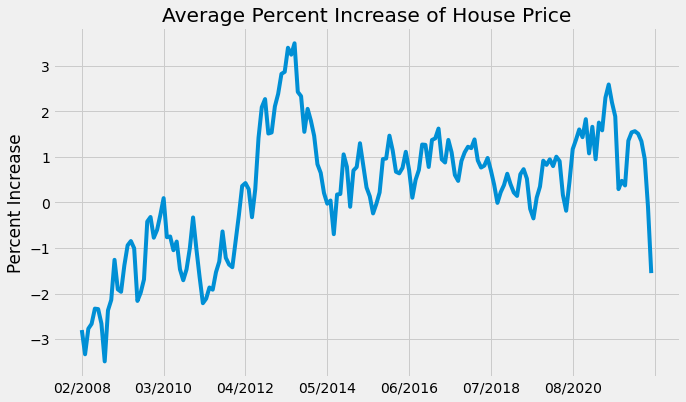

In [13]:
mean = np.mean(subset_percent, axis = 1)
ax = mean.plot(figsize = (10, 6))
plt.ylabel('Percent Increase')
plt.title('Average Percent Increase of House Price')
plt.show()

Average Housing Price

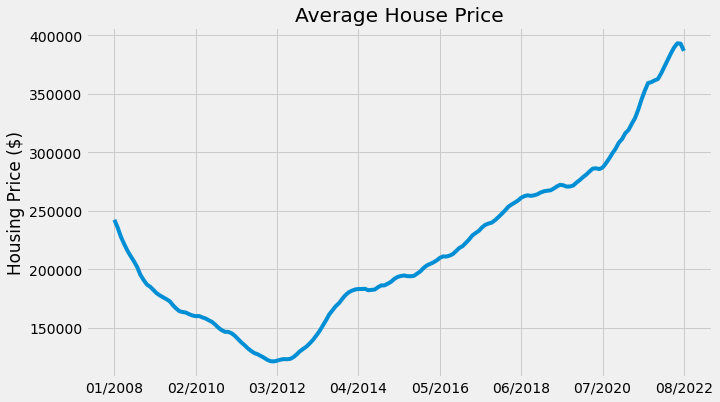

In [15]:
price_mean = np.mean(subset, axis = 1)
ax = price_mean.plot(figsize = (10, 6))
plt.ylabel('Housing Price ($)')
plt.title('Average House Price')
plt.show()

 Percent Increase All Zip Codes

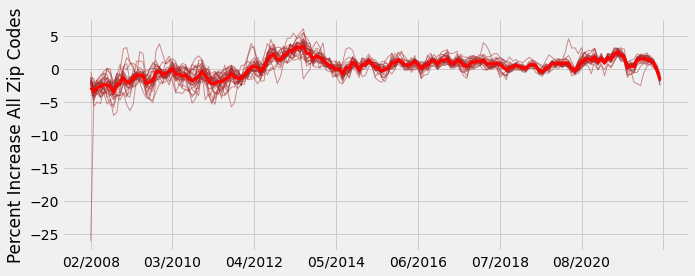

In [16]:
subset_percent.plot(figsize = (10, 4), lw = 1, color = 'brown', alpha = 0.5)
mean.plot(c = 'red', lw = 3)
plt.legend().set_visible(False)
plt.ylabel('Percent Increase All Zip Codes')
plt.show()

 Housing Price ($) All Zip Codes

In [17]:
subset.head(3)

,95823,95630,95624,95758,95608,95828,95670,95843,95610,95822,...,95825,95632,95842,95662,95834,95864,95841,95814,95811,95683
01/2008,133802.0,277974.0,186656.0,256688.0,209687.0,223392.0,256915.0,177058.0,230984.0,347985.0,...,235793.0,239334.0,176263.0,187326.0,221575.0,398713.0,150816.0,434479.0,363798.0,364938.0
02/2008,131579.0,273775.0,179289.0,247593.0,205596.0,219648.0,252203.0,173133.0,227958.0,344096.0,...,230673.0,236015.0,171678.0,186515.0,216820.0,391191.0,148098.0,426243.0,358181.0,354239.0
03/2008,128764.0,266485.0,172115.0,238262.0,199208.0,211567.0,244790.0,164889.0,221193.0,333530.0,...,223225.0,232652.0,163985.0,182649.0,209373.0,380798.0,142573.0,408132.0,348245.0,339433.0


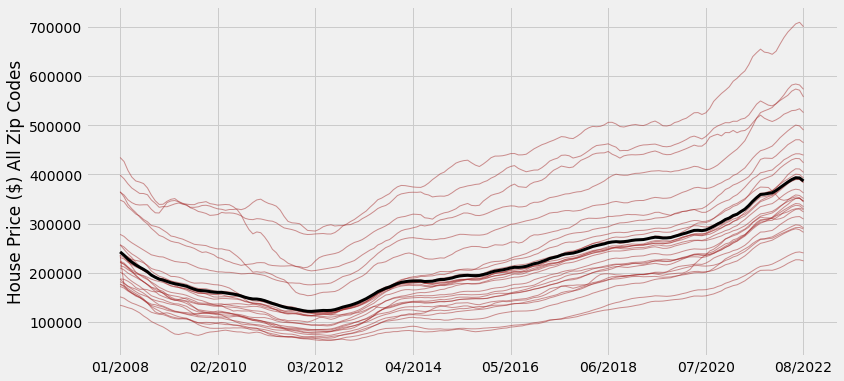

In [18]:
subset.plot(figsize = (12, 6), lw = 1, color = 'brown', alpha = 0.5)
price_mean.plot(c = 'black', lw = 3)
plt.legend().set_visible(False)
plt.ylabel('House Price ($) All Zip Codes')
plt.show()

 areas against the trend

 calculate absolute difference

In [19]:
diff_df = trdf_price.apply(lambda x: abs(x-mean))

 top 5 zipcodes with odd trends  

In [20]:
diffs = np.sum(diff_df, axis = 0).sort_values(ascending = False)
select_zipcodes = list(diffs.index[0:5])
print(f'top 5 zipcodes with odd trends: {select_zipcodes}')

top 5 zipcodes with odd trends: [95823, 95630, 95811, 95814, 95841]


 zip closest to average

In [21]:
print(f'closest to the average: {diffs.index[-2]}')

closest to the average: 95624
